<a href="https://colab.research.google.com/github/Mohit05012005/Authentication-and-Authorization-using-mern-stack/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Holiday Package Prediciton

### 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
### 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
The data consists of 20 column and 4888 rows.

In [5]:
## importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # px is an alias for the plotly.express library, which is used for creating interactive plots and visualizations.
import warnings
#  warnings is a built-in Python module that allows you to control how warning messages are handled during the execution of your code.
#  In this case, the line warnings.filterwarnings("ignore") is used to suppress any warning messages that might be generated by the code.
warnings.filterwarnings("ignore")

%matplotlib inline

<h1>step.1  Loading Of Dataset</h1>

In [6]:
df = pd.read_csv('/content/Travel.csv')

In [7]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


<h1>step.2 check wheather there is any null value.</h1>

In [8]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


<h1>step.3 check all the categories - checking missing values</h1>

In [9]:
df['Gender'].value_counts()

,count
Gender,
Male,2916
Female,1817
Fe Male,155


In [10]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')

In [11]:
df['Gender'].value_counts()

,count
Gender,
Male,2916
Female,1972


In [12]:
df['TypeofContact'].value_counts()
df['Occupation'].value_counts()
df['MaritalStatus'].value_counts()
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,2340
Unmarried,1598
Divorced,950


In [13]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


<h1> step.4 checking missing value.</h1>

In [14]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

In [15]:
df[features_with_na]

,Age,TypeofContact,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
0,41.0,Self Enquiry,6.0,3.0,3.0,1.0,0.0,20993.0
1,49.0,Company Invited,14.0,4.0,4.0,2.0,2.0,20130.0
2,37.0,Self Enquiry,8.0,4.0,3.0,7.0,0.0,17090.0
3,33.0,Company Invited,9.0,3.0,3.0,2.0,1.0,17909.0
4,NaN,Self Enquiry,8.0,3.0,4.0,1.0,0.0,18468.0
...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,9.0,5.0,4.0,2.0,1.0,26576.0
4884,28.0,Company Invited,31.0,5.0,3.0,3.0,2.0,21212.0
4885,52.0,Self Enquiry,17.0,4.0,4.0,7.0,3.0,31820.0
4886,19.0,Self Enquiry,16.0,4.0,3.0,3.0,2.0,20289.0


In [16]:
for feature in features_with_na:
  print(feature,np.round(df[feature].isnull().mean()*100,5))

Age 4.62357
TypeofContact 0.51146
DurationOfPitch 5.13502
NumberOfFollowups 0.92062
PreferredPropertyStar 0.53191
NumberOfTrips 2.86416
NumberOfChildrenVisiting 1.35025
MonthlyIncome 4.76678


So it will give columns and % of having null value in it:
So, in essence, this code calculates the percentage of missing values for each feature (column) in the DataFrame.

## Imputing Null values
1. Impute Median value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

#imputation strategies
mode - categorical data

mean,median - numerical data

median - for outliers   (not symmetrical)

mean - when no or less outliers(symmetrical data)


In [17]:
#Age
df.Age.fillna(df.Age.median(), inplace=True)

#TypeofContract
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

#DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

#NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

#NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [18]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


In [19]:
df.drop('CustomerID',inplace=True,axis=1)

In [20]:
df.isnull().sum()

,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0
ProductPitched,0


## Feature Extraction

I can add the person visiting and children visiting , as it is not that important who is visiting

In [21]:
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']

In [22]:
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],inplace=True)

In [23]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome',
       'TotalVisiting'],
      dtype='object')

In [24]:
# extract all the numerical features
num_features = [features for features in df.columns if df[features].dtype !='O']  # O mean object type

In [25]:
print("Number of numerical features: ",len(num_features))

Number of numerical features:  12


In [26]:
# extract all the categorical features
cat_features = [features for features in df.columns if df[features].dtype == 'O']

In [27]:
print("Number of categorical features: ",len(cat_features))

Number of categorical features:  6


In [28]:
# extract all the descrete features -- features have less than 25 unique values in numerical features
des_features = [features for features in  num_features if len(df[features].unique())<=25]

In [29]:
print("Number of descrete features: ",len(des_features))

Number of descrete features:  9


In [30]:
# extract all the continous features
con_features = [features for features in num_features if features not in des_features]

In [31]:
print("Number of continous features: ",len(con_features))

Number of continous features:  3


In [32]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


## Train Test split and Model Traning

In [33]:
# onehot encoding and binary encoding

In [34]:
from sklearn.model_selection import train_test_split
x = df.drop('ProdTaken',axis=1)
y = df['ProdTaken']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=5,test_size=0.2)
x_test.shape,x_train.shape

((978, 17), (3910, 17))

In [36]:
x.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [37]:
y.value_counts()

,count
ProdTaken,
0,3968
1,920


In [38]:
# here data is imbalance but so algo like - xgboost,random forest perform well in imbalance output .

In [39]:
# Create Column Transformer with 3 types of transformers
# cat_features = X.select_dtypes(include="object").columns
# num_features = X.select_dtypes(exclude="object").columns

# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer

# numeric_transformer = StandardScaler()
# oh_transformer = OneHotEncoder(drop='first')

# preprocessor = ColumnTransformer(
#     [
#          ("OneHotEncoder", oh_transformer, cat_features),
#           ("StandardScaler", numeric_transformer, num_features)
#     ]
# )

cat_features = x.select_dtypes(include='object').columns
num_features = x.select_dtypes(exclude='object').columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')


preprocessing = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [40]:
x_train = preprocessing.fit_transform(x_train)

## One-Hot Encoding is a technique used to convert categorical variables into a numerical format that machine learning models can understand. It creates a new binary column for each unique category in the original categorical feature. For example, if you had a 'Color' feature with values like 'Red', 'Blue', and 'Green', One-Hot Encoding would create three new columns: 'Color_Red', 'Color_Blue', and 'Color_Green'. Each row would have a '1' in the column corresponding to its color and '0' in the others.

Since you had several categorical features (TypeofContact, Occupation, Gender, ProductPitched, MaritalStatus, and Designation), the OneHotEncoder created new columns for each unique value within those categories. This expanded the total number of columns in your training data (x_train). The drop='first' argument in the OneHotEncoder prevents multicollinearity by dropping one category from each feature, which is why you don't see a column for every single unique value across all categories.

In [41]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.714011,1.795014,1.303864,-0.734852,-0.684321,-0.645100,-0.042577,0.785944,0.864907,-0.065058
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.461123,-1.140933,-2.726261,1.764731,-0.684321,-0.645100,0.690799,-1.272355,-0.235355,-1.470449
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.714011,-0.896271,-0.711198,-0.734852,-0.684321,-0.645100,-0.042577,-1.272355,0.047553,-1.470449
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.714011,-1.140933,-0.711198,-0.734852,2.111016,-0.645100,0.690799,0.785944,1.639617,-0.767754
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.714011,-0.896271,-0.711198,-0.734852,-0.684321,1.550148,-0.042577,0.785944,-0.235355,-0.767754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.714011,-0.773940,1.303864,-0.734852,2.111016,1.550148,-0.775953,0.785944,0.367281,0.637638
3906,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.714011,-0.284615,-0.711198,-0.734852,-1.243389,-0.645100,-0.042577,0.785944,-0.695410,-0.065058
3907,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.714011,0.327040,0.296333,-0.734852,0.992881,-0.645100,1.424174,-1.272355,2.818590,0.637638
3908,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,-0.714011,0.938696,0.296333,-0.734852,-1.243389,-0.645100,-1.509328,0.785944,0.041918,0.637638


## That's a fundamental concept in machine learning preprocessing!

Here's the difference between fit_transform() and transform():

fit_transform(data): This method is used on the training data. It performs two steps:
fit(data): It learns the parameters from the data (e.g., calculates the mean and standard deviation for StandardScaler, or identifies the unique categories for OneHotEncoder).
transform(data): It then applies the learned transformation to the same data.
transform(data): This method is used on new data (like your testing data). It only applies the transformation using the parameters that were learned during the fit() step on the training data. It does not learn new parameters from the new data.
Why is this important?

You want your preprocessing steps to be consistent between your training and testing data. If you used fit_transform() on your testing data, the scaler or encoder would learn new parameters from the testing data, which could lead to data leakage and an overly optimistic evaluation of your model's performance.

In [42]:
## apply transformation on test data
x_test = preprocessing.transform(x_test)

In [43]:
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.461123,-0.529278,-0.711198,-0.734852,0.433813,-0.645100,-0.775953,-1.272355,-1.223656,-0.767754
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.461123,-0.529278,-0.711198,0.514940,-0.684321,-0.645100,-0.042577,-1.272355,-1.091595,-1.470449
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.714011,2.284338,0.296333,0.514940,-0.684321,-0.645100,-0.042577,0.785944,1.522396,-1.470449
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.714011,2.039676,0.296333,-0.734852,-0.125254,1.550148,1.424174,-1.272355,-0.399540,-0.065058
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.714011,0.816365,0.296333,-0.734852,-0.125254,-0.645100,1.424174,0.785944,-0.693156,1.340334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.714011,-1.018602,0.296333,-0.734852,-0.684321,1.550148,0.690799,-1.272355,-0.519954,-0.065058
974,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.714011,0.571703,-0.711198,-0.734852,-1.243389,1.550148,1.424174,0.785944,-0.378312,-0.767754
975,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.714011,-0.406947,1.303864,1.764731,-0.684321,1.550148,-1.509328,0.785944,-0.282319,0.637638
976,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.714011,-0.284615,-0.711198,-0.734852,-0.684321,-0.645100,1.424174,0.785944,-0.959721,-0.767754


## Random forest classifier training

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [45]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier()
}
list(models)
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8468
- F1 score: 0.8213
- Precision: 0.7196
- Recall: 0.3122
- Roc Auc Score: 0.6419
----------------------------------
Model performance for Test set
- Accuracy: 0.8476
- F1 score: 0.8210
- Precision: 0.7067
- Recall: 0.2944
- Roc Auc Score: 0.6334


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9049
- F1 score: 0.9062
- Precision: 0.7254
- Recall: 0.7778
- Roc Auc Score: 0.8557


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9397
- F1 score: 0.9362
- Precision: 0.9481
- Recall: 0.7111
- Roc Auc Score: 0.8512


Gradient Boost
Model performance for Training se

## So here we get to know that random forest is better

In [46]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [47]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params)

                   ]

In [48]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=20,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 20 candidates, totalling 60 fits
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 5, 'max_depth': None}


In [51]:
models={

    "Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9519
- F1 score: 0.9499
- Precision: 0.9586
- Recall: 0.7722
- Roc Auc Score: 0.8824




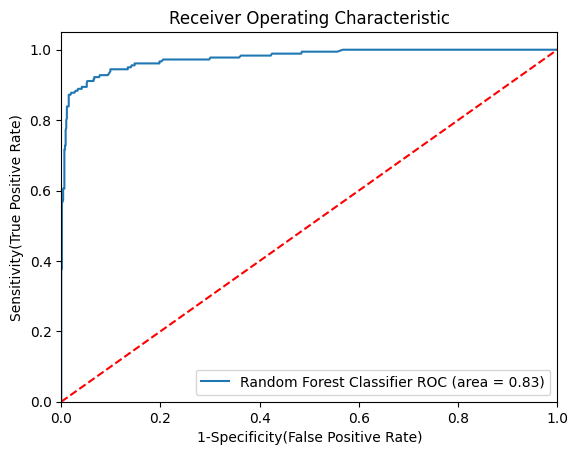

In [54]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    'auc':  0.8325
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(x_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()